In [1]:
import numpy as np
import matplotlib.pylab as plt

In [5]:
def meanSquaredError(y, t):
    return 0.5*np.sum((y-t)**2)

In [7]:
y = [0.1, 0.05, 0.6, 0.2, 0.05]
t = [0, 0, 1, 0, 0]
meanSquaredError(np.array(y), np.array(t))

0.10750000000000003

In [8]:
y = [0.1, 0.05, 0.05, 0.2, 0.6]
t = [0, 0, 1, 0, 0]
meanSquaredError(np.array(y), np.array(t))

0.6575

## 4.2.2 交差エントロピー誤差

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [16]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.2, 0.0, 0.0, 0.0,0.0]

In [14]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.2, 0.0, 0.0, 0.0,0.0],[0.1, 0.05, 0.6, 0.0, 0.05, 0.2, 0.0, 0.0, 0.0,0.0]]

In [9]:
delta = 1e-7
np.array(t)*np.log(np.array(y)+delta)

array([[-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

In [17]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [18]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.2, 0.0, 0.6, 0.0, 0.0]

In [19]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3ミニバッチ学習

In [1]:
from DLfromscratch.dataset.mnist import load_mnist

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
#10枚ランダムに取り出し
trainSize = x_train.shape[0]
batchSize = 10
batchMask = np.random.choice(trainSize, batchSize)

x_batch = x_train[batchMask]
t_batch = t_train[batchMask]


In [8]:
np.random.choice(trainSize, batchSize)

array([57178, 46628, 58784, 37856, 40311, 30286, 22240, 10450, 24220,
       11460])

## 4.2.4[バッチ対応版]交差エントロピーの実装

In [2]:
#batchの平均値を出力
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batchSize = y.shape[0]
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))/batchSize

In [3]:
#batchの平均値を出力
#ラベルがone-hotではない場合(2とか７とか)
#引数はnumpy形式であること。
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batchSize = y.shape[0]
    delta = 1e-7
    #sumは縦横すべて足し合わせる。
    #arrange(5)⇒[0,1,2,3,4]
    return -np.sum(np.log(y[np.arange(batchSize), t]+delta))/batchSize

In [49]:
t = np.array([2,1,0,3,4])
y = np.array([[0,0,1,0,0],[0,0.5,0.5,0,0],[1,0,0,0,0],[0,0,0,1,0],[0,0,0,0,1]])

In [50]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [51]:
y[a, t]

array([1. , 0.5, 1. , 1. , 1. ])

In [52]:
delta = 1e-7
-np.sum(np.log(y[a, t]+delta))/5

0.13862931611199703

In [53]:
y = np.array([[0,0,0,1,0],[0,0.5,0.5,0,0],[1,0,0,0,0],[0,0,0,1,0],[0,0,0,0,1]])
delta = 1e-7
-np.sum(np.log(y[a, t]+delta))/5
#明後日の方向の間違いをすると大体O(1)を超えるレベルのスコアが出る。

3.3622484663036607

# 4.3 数値微分

## 4.3.1 微分

In [2]:
#数値微分
def numerical_diff(f, x):
    h = 1e-4 #良い結果が出る丁度いいスケール
    return (f(x+h)-f(x-h))/(2*h)

## 4.3.2 数値微分の例

In [3]:
def function_1(x):
    return 0.01*x**2+0.1*x

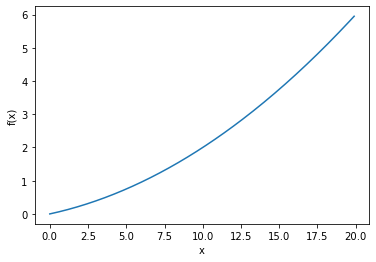

In [9]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0, 20.0, 0.1) #0から20までの0.1刻み配列（x軸）
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [8]:
numerical_diff(function_1, 5)

0.1999999999990898

In [10]:
numerical_diff(function_1, 10)

0.2999999999986347

In [3]:
from DLfromscratch.ch04 import gradient_2d

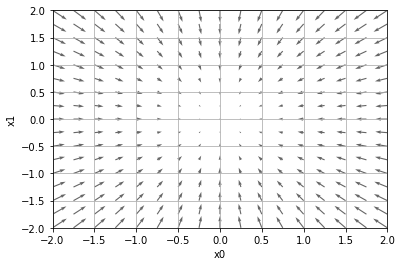

In [6]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = gradient_2d.numerical_gradient(gradient_2d.function_2, np.array([X, Y]).T).T

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

In [2]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [3]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) #引数と同じサイズのゼロ配列生成。
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        #f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        #微分計算
        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val #値をもとに戻す。
    
    return grad    

In [6]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [13]:
numerical_gradient(function_2, np.array([0.0,4.0]))

array([0., 8.])

In [12]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f,x)
        x -= lr*grad
    
    return x, np.array(x_history)

In [20]:
init_x = np.array([-5., 2])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=100)
print(x)

[-1.01851799e-09  4.07407195e-10]


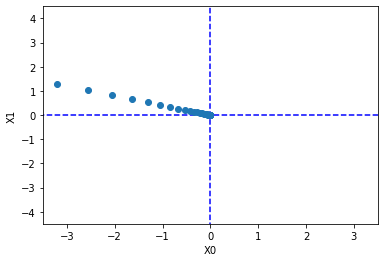

In [21]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 4.4.2 ニューラルネットワークに対する勾配

In [2]:
from DLfromscratch.common.functions import softmax, cross_entropy_error
from DLfromscratch.common.gradient import numerical_gradient

In [3]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [4]:
net = simpleNet()

In [5]:
print(net.W)

[[-0.14490851  2.08798359  2.59206544]
 [ 0.56542725 -0.71726198  0.40301894]]


In [6]:
x = np.array([0.6, 0.9])

p = net.predict(x)

In [7]:
p

array([0.42193942, 0.60725438, 1.9179563 ])

In [8]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.4012235863494779

In [13]:
f = lambda w: net.loss(x, t)

In [14]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.08998913,  0.10831069, -0.19829982],
       [ 0.13498369,  0.16246603, -0.29744973]])

In [15]:
net.W[0]

array([-0.14490851,  2.08798359,  2.59206544])

In [1]:
# coding: utf-8
from DLfromscratch.common.functions import *
from DLfromscratch.common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


In [21]:
train_loss_list = []

#hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.02

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grads = network.gradient(x_batch, t_batch)
    
    #parameterの更新
    for key in ('W1', 'b1', "W2", "b2"):
        network.params[key] -= learning_rate*grads[key]
    
    #学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

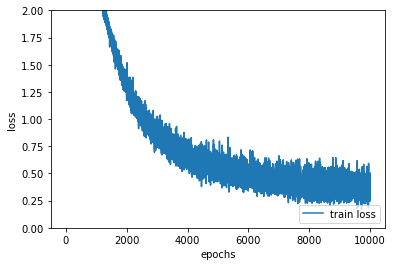

In [25]:
# グラフの描画
import matplotlib.pyplot as plt
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 2)
plt.legend(loc='lower right')
plt.show()

## 4.5.3　テストデータで評価

In [3]:
# coding: utf-8
from DLfromscratch.common.functions import *
from DLfromscratch.common.gradient import numerical_gradient
import numpy as np
from DLfromscratch.dataset.mnist import load_mnist


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

#hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

#1エポック当たりの繰り返し数
iter_per_epoch = max(train_size/batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grads = network.gradient(x_batch, t_batch)
    
    #parameterの更新
    for key in ('W1', 'b1', "W2", "b2"):
        network.params[key] -= learning_rate*grads[key]
    
    #学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    #1epochごとに認識制度を確認。
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7769166666666667, 0.7849
train acc, test acc | 0.8788666666666667, 0.8838
train acc, test acc | 0.8997166666666667, 0.9024
train acc, test acc | 0.9087333333333333, 0.9114
train acc, test acc | 0.9156666666666666, 0.9176
train acc, test acc | 0.9198833333333334, 0.9204
train acc, test acc | 0.92385, 0.9241
train acc, test acc | 0.9277166666666666, 0.9274
train acc, test acc | 0.9309166666666666, 0.9291
train acc, test acc | 0.9342333333333334, 0.9336
train acc, test acc | 0.9368333333333333, 0.935
train acc, test acc | 0.93945, 0.9368
train acc, test acc | 0.9416833333333333, 0.9396
train acc, test acc | 0.9430333333333333, 0.9415
train acc, test acc | 0.94575, 0.9434
train acc, test acc | 0.9465833333333333, 0.9439


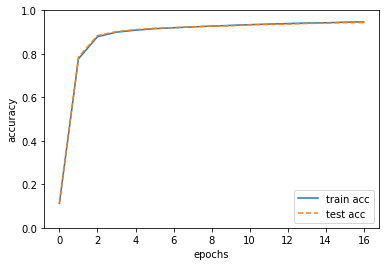

In [5]:
# グラフの描画
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()